# Netflix Movies and TV Shows Dataset
- show_id: A unique identifier for each title.
- type: The category of the title, which is either 'Movie' or 'TV Show'.
- title: The name of the movie or TV show.
- director: The director(s) of the movie or TV show. (Contains null values for some entries, especially TV shows where this information might not be applicable.)
- cast: The list of main actors/actresses in the title. (Some entries might not have this information.)
- country: The country or countries where the movie or TV show was produced.
- date_added: The date the title was added to Netflix.
- release_year: The year the movie or TV show was originally released.
- rating: The age rating of the title.
- duration: The duration of the title, in minutes for movies and seasons for TV shows.
- listed_in: The genres the title falls under.
- description: A brief summary of the title.

In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [21]:
# import necessary lib 
import matplotlib.pyplot as plt
%matplotlib inline
# import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [22]:
movie_data = pd.read_csv('netflix_titles.csv', encoding='latin1')
movie_data.shape

(8809, 26)

In [23]:
movie_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [24]:
# dropping unnecessary columns 
movie_data.drop(columns=movie_data.columns[12::], inplace=True)

In [25]:

main_data=movie_data


In [26]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [27]:
# Check for missing values
main_data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Dealing with missing data
- replace blank countries with the mode (most common) country
- keep director as it could be interesting to look at a certain director's films
- keep cast as it could be interesting to look at a certain cast's films

In [28]:
# mode() Gives most common country. mode()[0] gives most common country as string
main_data['country'].mode()[0]

'United States'

In [29]:
# Replacments
# replacing nan country name with most common country name.
main_data['country'] = main_data['country'].fillna(main_data['country'].mode()[0]) 

# replacing nan vaulues to No Data.
main_data['cast'].replace(np.nan, 'No Data',inplace  = True)
main_data['director'].replace(np.nan, 'No Data',inplace  = True)

# Drops null values

main_data.dropna(inplace=True)

# Drop Duplicates

main_data.drop_duplicates(inplace= True)

In [30]:
main_data.cast.head(2)

0                                              No Data
1    Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
Name: cast, dtype: object

In [31]:
# We need to use the strip module first because some values in this dataset still contain spaces at the beginning or end of string.
main_data["date_added"] = main_data["date_added"].str.strip()

# convert dtype to datetime 
main_data["date_added"] = pd.to_datetime(main_data['date_added'])

# extract month and year using pandas date time accessor (dt acessor)
main_data['month_added']=main_data['date_added'].dt.month_name()
main_data['year_added'] = main_data['date_added'].dt.year

In [32]:
main_data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021


In [33]:
# check if any null value still exist
main_data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
month_added     0
year_added      0
dtype: int64

In [34]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8792 entries, 0 to 8808
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8792 non-null   object        
 1   type          8792 non-null   object        
 2   title         8792 non-null   object        
 3   director      8792 non-null   object        
 4   cast          8792 non-null   object        
 5   country       8792 non-null   object        
 6   date_added    8792 non-null   datetime64[ns]
 7   release_year  8792 non-null   int64         
 8   rating        8792 non-null   object        
 9   duration      8792 non-null   object        
 10  listed_in     8792 non-null   object        
 11  description   8792 non-null   object        
 12  month_added   8792 non-null   object        
 13  year_added    8792 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(11)
memory usage: 996.0+ KB


# Let's start EDA!

<AxesSubplot: ylabel='count'>

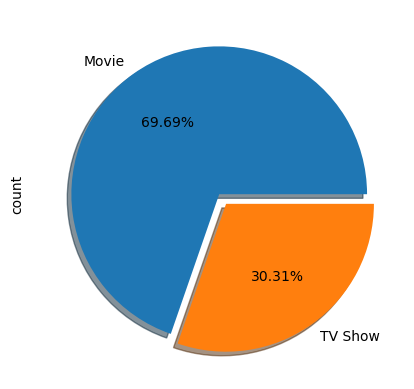

In [35]:
# Let's look at Movie Types.
# Create our pie chart with labels

main_data["type"].value_counts().plot.pie(autopct='%1.2f%%',explode=[0,0.08], shadow = True)

## Okay, we know that type of content, movie is more than TV Show
### Next, we will see top 10 countries that have content on Netfilx

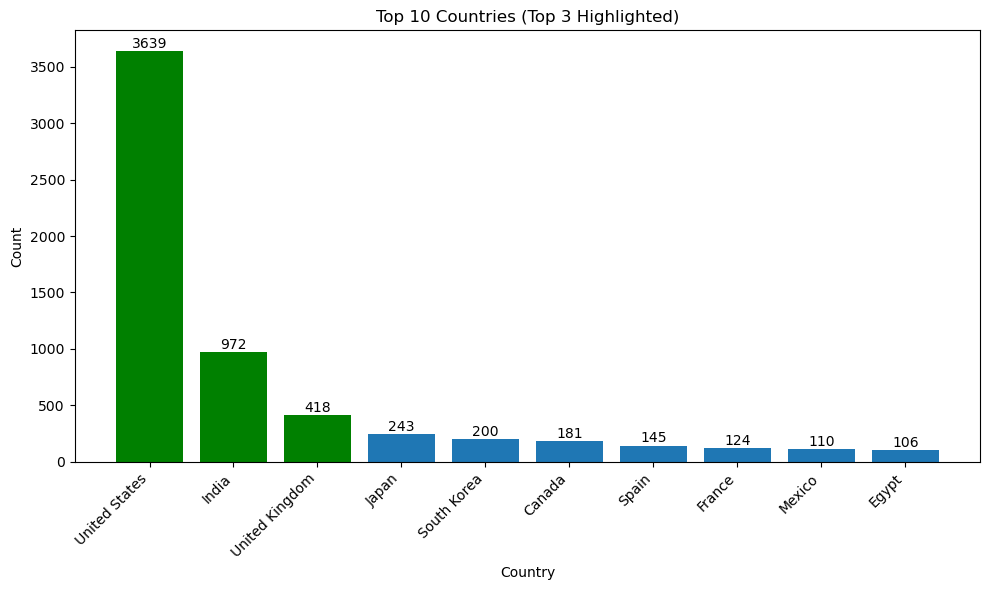

In [36]:
country_counts = main_data['country'].value_counts().head(10)  # Top 10 countries

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as desired
bars = plt.bar(country_counts.index, country_counts.values)

# Add count values on top of bars
for bar, count in zip(bars, country_counts.values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.2, count, ha='center', va='bottom')

# Highlight top 3 countries
plt.bar(country_counts.index[:3], country_counts.values[:3], color='green')  

# Customize the plot
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries (Top 3 Highlighted)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

In [37]:
# Count movies and TV shows per country
movie_counts_country = main_data[main_data['type'] == 'Movie']['country'].value_counts()
tv_show_counts_country = main_data[main_data['type'] == 'TV Show']['country'].value_counts()

# Combine counts into a single DataFrame with total (use add with fill_value=0 for missing values)
df_counts = pd.DataFrame({'Movie': movie_counts_country, 'TV Show': tv_show_counts_country})
df_counts['total_by_country'] = df_counts.sum(axis=1)

# Sort by total count in descending order and select top 10
top_10_counts = df_counts.sort_values(by='total_by_country', ascending=False).head(10)

# Print the top 10 countries with movie, TV show, and total counts
print(top_10_counts)


                 Movie  TV Show  total_by_country
country                                          
United States   2495.0   1144.0            3639.0
India            893.0     79.0             972.0
United Kingdom   206.0    212.0             418.0
Japan             76.0    167.0             243.0
South Korea       41.0    159.0             200.0
Canada           122.0     59.0             181.0
Spain             97.0     48.0             145.0
France            75.0     49.0             124.0
Mexico            70.0     40.0             110.0
Egypt             92.0     14.0             106.0


## We already know top 10 countries.
### Next, we will compare between Movie and TV Show for top 10 countries.

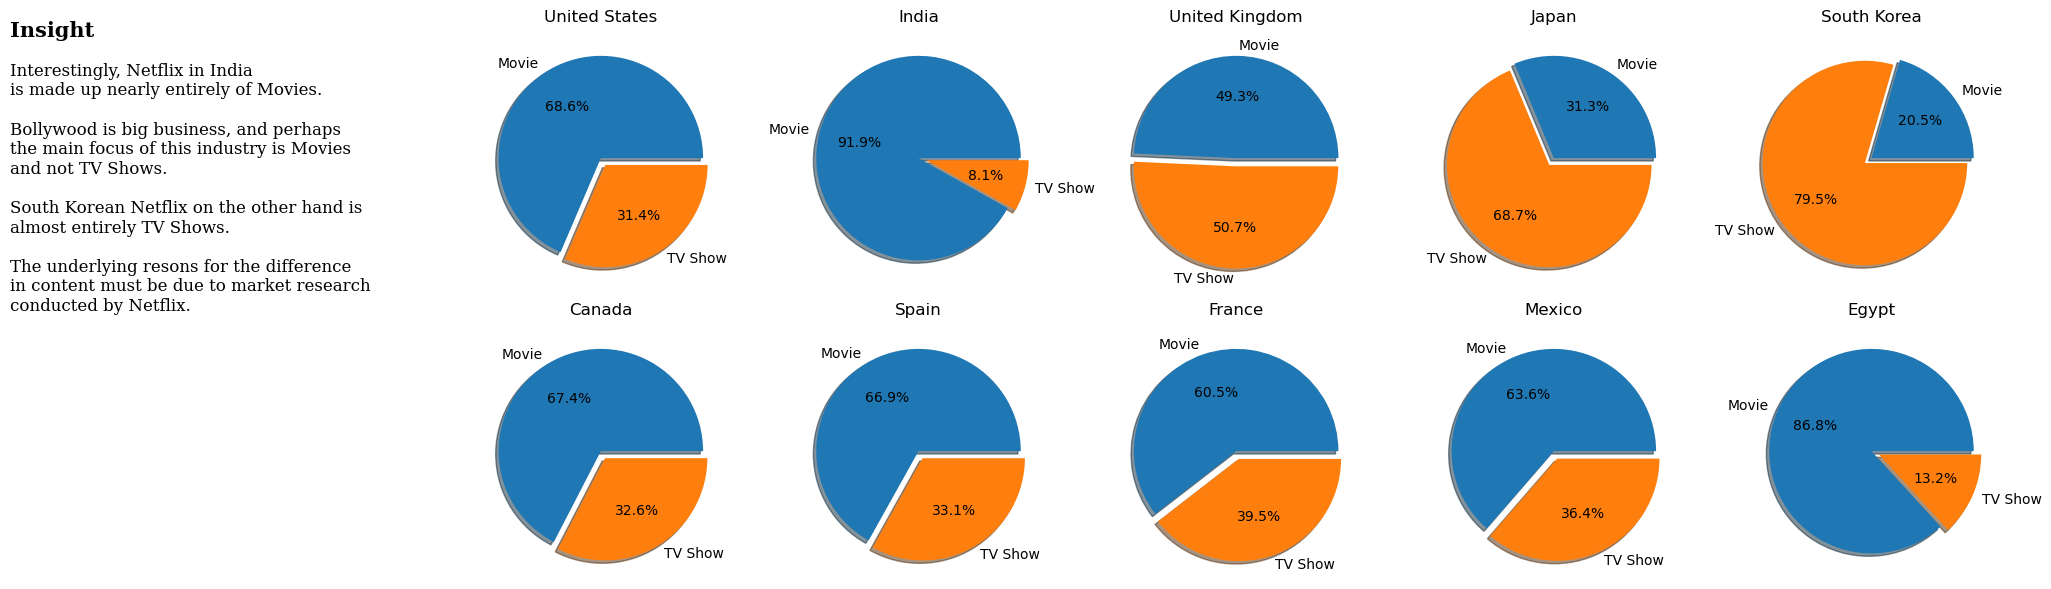

In [38]:
rows, cols = 2, 5
fig, axes = plt.subplots(rows, cols, figsize=(16, 6))  # Adjust figsize for better visualization

# Counter to keep track of subplot position
counter = 0

# Loop through each row (country) in the DataFrame
for country, row in top_10_counts.iterrows():
  # Extract movie, tv show, and total counts
  movie_count = row['Movie']
  tv_show_count = row['TV Show']
  total_count = row['total_by_country']

  # Create labels for pie chart slices
  labels = ['Movie', 'TV Show']

  # Create pie chart slice sizes
  sizes = [movie_count, tv_show_count]

  # Select the current subplot based on counter
  ax = axes[counter // cols, counter % cols]
 

  # Create a pie chart on the selected subplot
  ax.pie(sizes, labels=labels, autopct="%1.1f%%", explode = [0,0.08], shadow = True)
  ax.set_title(country)

  # Increase counter for next subplot position
  counter += 1

fig.text(-0.28, 0.93, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(-0.28, 0.44, '''
Interestingly, Netflix in India
is made up nearly entirely of Movies. 

Bollywood is big business, and perhaps
the main focus of this industry is Movies
and not TV Shows.

South Korean Netflix on the other hand is 
almost entirely TV Shows.

The underlying resons for the difference 
in content must be due to market research
conducted by Netflix.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')


# Adjust layout to prevent overlapping elements
plt.tight_layout()
plt.show()


# WOW! Mostly, Contents from Japan and South Korea are TV Shows.

# Next, We will check rating of content.

In [39]:
main_data.sample(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
3091,s3092,Movie,"El Pepe, a Supreme Life",Emir Kusturica,"JosÃ© Mujica, Emir Kusturica","Argentina, Uruguay, Serbia",2019-12-27,2018,TV-14,73 min,"Documentaries, International Movies","In this intimate documentary, former Uruguayan...",December,2019
6191,s6192,Movie,At All Costs,Mike Nicoll,"Parker Jackson Cartwright, Gabe York",United States,2016-12-14,2016,TV-MA,81 min,"Documentaries, Sports Movies",This revealing documentary explores how the hi...,December,2016


In [40]:
# medo of treating column name as object
movie_rating=main_data[main_data.type=='Movie'].rating.value_counts()
tvshow_rating=main_data[main_data.type=='TV Show'].rating.value_counts()
rated_data = pd.DataFrame({'Movie':movie_rating, 'TV Show':tvshow_rating})
rated_data['rated_by_type']=rated_data.sum(axis=1)
rated_data.sort_values(by='rated_by_type',ascending=False).head(10)

,Movie,TV Show,rated_by_type
rating,,,
TV-MA,2062,1144.0,3206.0
TV-14,1427,730.0,2157.0
TV-PG,540,321.0,861.0
R,797,2.0,799.0
PG-13,490,NaN,490.0
TV-Y7,139,194.0,333.0
TV-Y,131,175.0,306.0
PG,287,NaN,287.0
TV-G,126,94.0,220.0


In [41]:
main_data.rating.value_counts()

rating
TV-MA       3206
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
A              1
Name: count, dtype: int64

### I think we should drop genre 'A' content

In [42]:
#Removing A rated movie 
main_data=main_data[main_data.rating !='A']

# Count movies and TV shows per country

movie_counts_rating = main_data[main_data.type == 'Movie'].rating.value_counts()
tv_show_counts_rating = main_data[main_data.type == 'TV Show'].rating.value_counts()

# Combine counts into a single DataFrame with total (use add with fill_value=0 for missing values)
df_counts = pd.DataFrame({'Movie': movie_counts_rating, 'TV Show': tv_show_counts_rating})
df_counts.fillna(0, inplace=True)
df_counts['total_by_type'] = df_counts.sum(axis=1)

# Sort by total count in descending order
rating_agg = df_counts.sort_values(by='total_by_type', ascending=False)

print(rating_agg)

          Movie  TV Show  total_by_type
rating                                 
TV-MA      2062   1144.0         3206.0
TV-14      1427    730.0         2157.0
TV-PG       540    321.0          861.0
R           797      2.0          799.0
PG-13       490      0.0          490.0
TV-Y7       139    194.0          333.0
TV-Y        131    175.0          306.0
PG          287      0.0          287.0
TV-G        126     94.0          220.0
NR           75      4.0           79.0
G            41      0.0           41.0
TV-Y7-FV      5      1.0            6.0
NC-17         3      0.0            3.0
UR            3      0.0            3.0


## Distribution of Movies and TV Shows

In [43]:
rating_agg.index

Index(['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y', 'PG', 'TV-G',
       'NR', 'G', 'TV-Y7-FV', 'NC-17', 'UR'],
      dtype='object', name='rating')

In [44]:
rated_data

,Movie,TV Show,rated_by_type
rating,,,
A,1,NaN,1.0
G,41,NaN,41.0
NC-17,3,NaN,3.0
NR,75,4.0,79.0
PG,287,NaN,287.0
PG-13,490,NaN,490.0
R,797,2.0,799.0
TV-14,1427,730.0,2157.0
TV-G,126,94.0,220.0


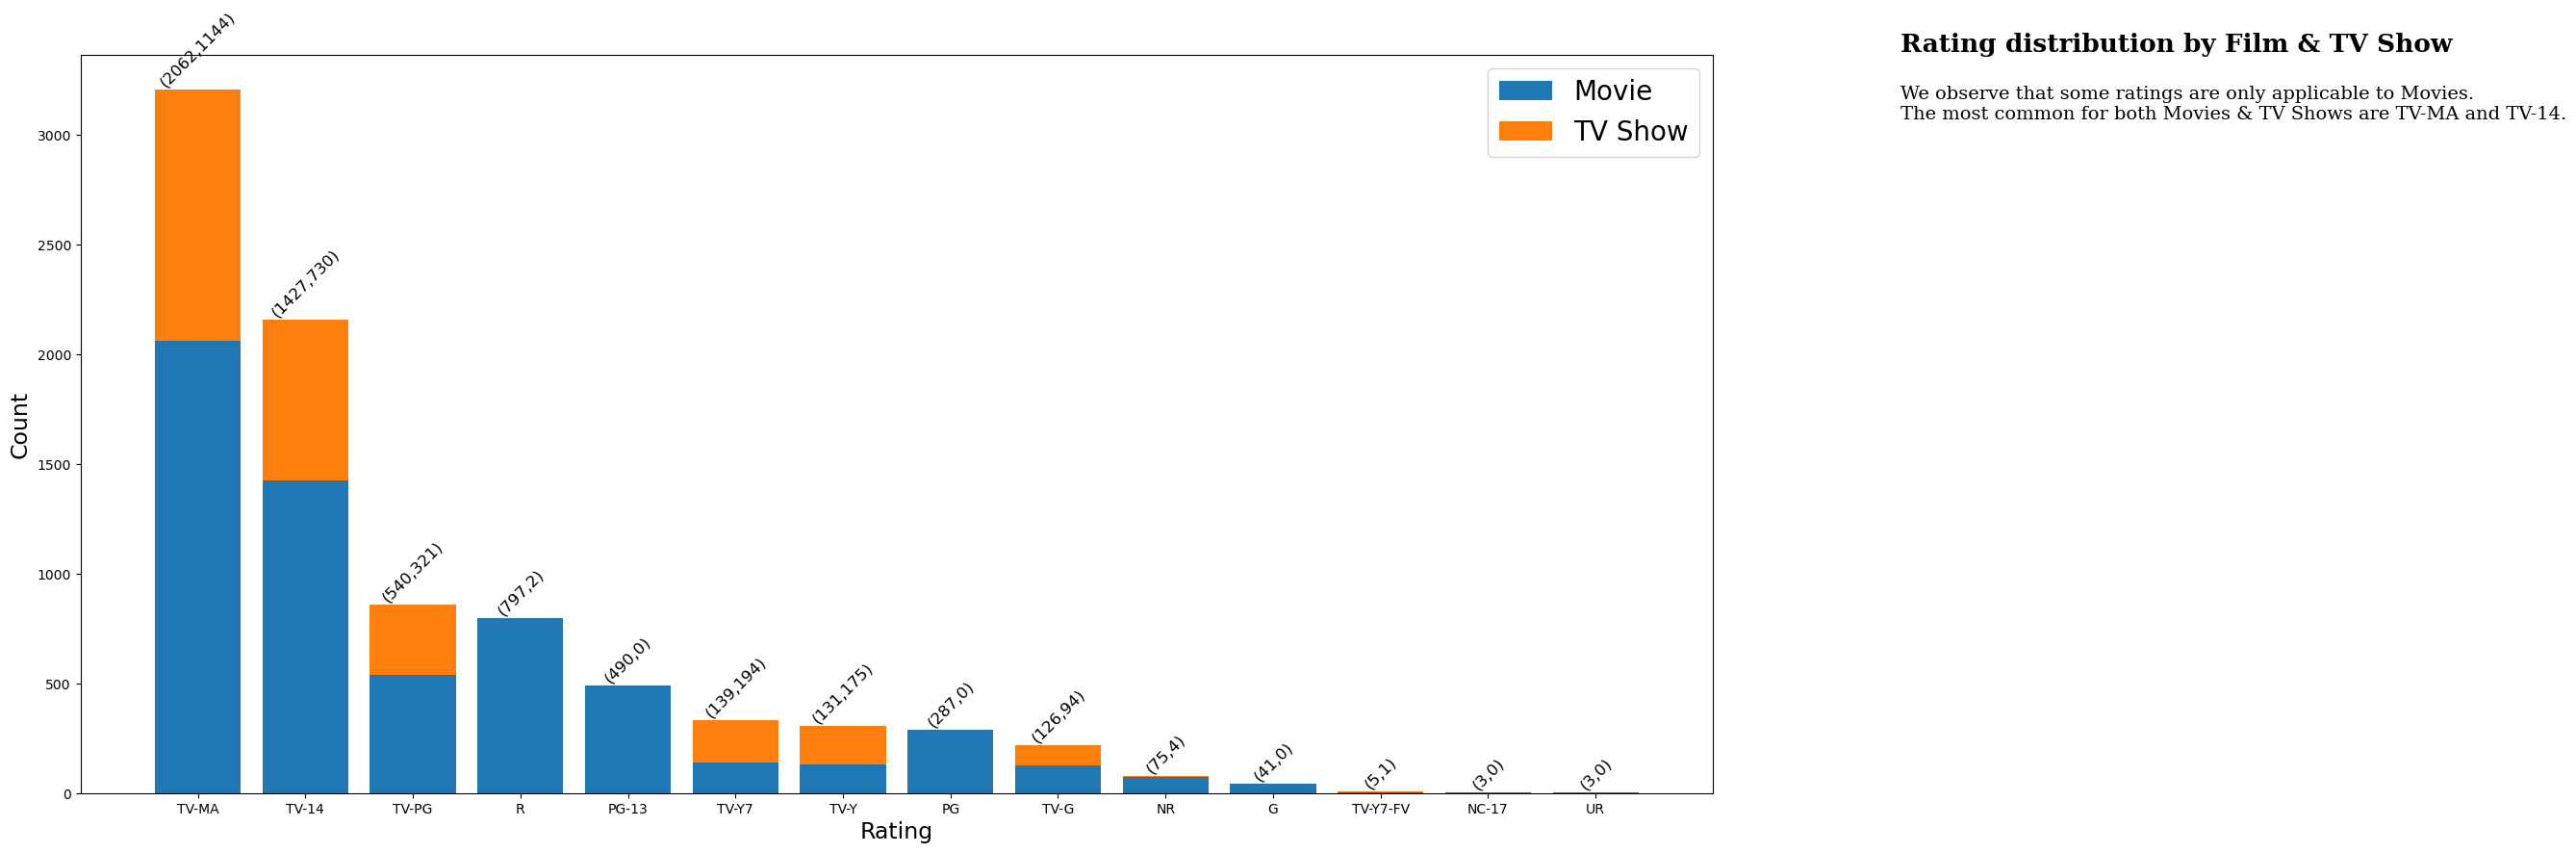

In [45]:
movie_counts_rating 
tv_show_counts_rating 

# Combine counts into a single DataFrame with total
df_counts = pd.DataFrame({'Movie': movie_counts_rating, 'TV Show': tv_show_counts_rating})
df_counts.fillna(0, inplace=True)  # Fill missing values with 0
df_counts['total_by_type'] = df_counts.sum(axis=1)

# Sort by total count in descending order
rating_agg = df_counts.sort_values(by='total_by_type', ascending=False)

# Create dual stacked bar chart and legend
fig, ax = plt.subplots(figsize=(18, 9))
ax.bar(rating_agg.index, rating_agg['Movie'], label='Movie')
ax.bar(rating_agg.index, rating_agg['TV Show'], bottom=rating_agg['Movie'], label='TV Show')

# Add total labels on top of each stack
for idx, row in rating_agg.iterrows():
    total_label = f"({int(row['Movie'])},{int(row['TV Show'])})"
    y_pos = row['Movie'] + row['TV Show']  # Adjust based on bar width
    ax.text(idx, y_pos, total_label, ha='center', va='bottom', fontsize=12, rotation=45)  # Customize label position and size

# Customize chart appearance
ax.set_xlabel('Rating', fontsize = 17)
ax.set_ylabel('Count', fontsize = 17)
ax.legend(loc='upper right', prop={'size': 20})
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.tight_layout()
ax.legend(loc='upper right', prop={'size': 20})

fig.text(1.1, 0.93, 'Rating distribution by Film & TV Show', fontsize=19, fontweight='bold', fontfamily='serif')
fig.text(1.1, 0.83, 
'''We observe that some ratings are only applicable to Movies. 
The most common for both Movies & TV Shows are TV-MA and TV-14.
'''
, fontsize=14, fontweight='light', fontfamily='serif')

plt.show()

# How has content been added over the years?¶ 
 As we saw in the timeline at the start of this analysis, Netflix went global in 2016 - and it is extremely noticeable in this plot.
 
 The increase in Movie content is remarkable.

In [46]:
# 2024 data is incomplete, its better to remove it
main_data = main_data[main_data.year_added != 2024]
movie_per_year =main_data[main_data.type=='Movie'].year_added.value_counts()
tv_shows_per_year =main_data[main_data.type=='TV Show'].year_added.value_counts()
# combine data to create a dataframe
added_by_year = pd.DataFrame({'Movie':movie_per_year, 'TV Show':tv_shows_per_year})
added_by_year['total_by_year'] = added_by_year.sum(axis=1)

# sorting values 
sorted_content_yearwise = added_by_year.sort_values(by='total_by_year', ascending=False)
sorted_content_yearwise

,Movie,TV Show,total_by_year
year_added,,,
2019,1424,592.0,2016.0
2020,1284,595.0,1879.0
2018,1237,411.0,1648.0
2021,993,505.0,1498.0
2017,836,349.0,1185.0
2016,251,175.0,426.0
2015,56,26.0,82.0
2014,19,5.0,24.0
2011,13,NaN,13.0


In 2019, total no. of 2016 movies/tv shows were released in Netflix.


### Ploting Yearwise content distribution

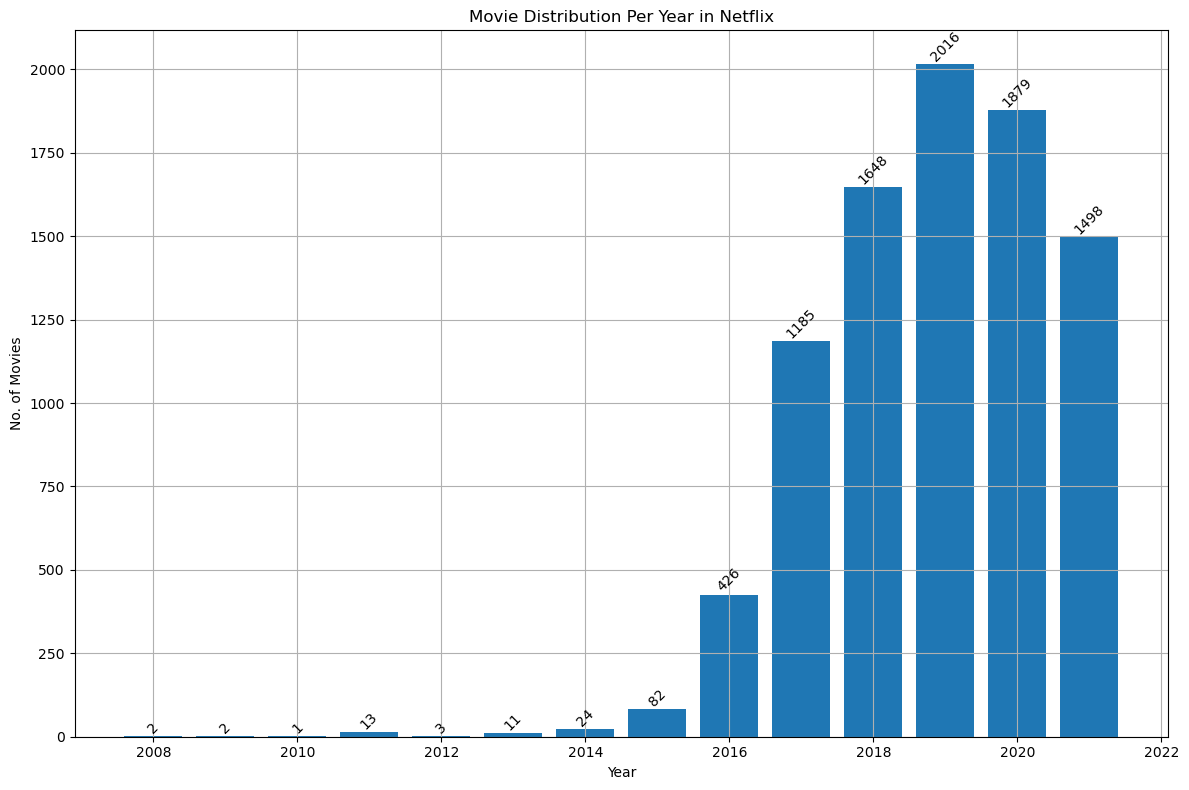

In [47]:
#ploting bar 
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(sorted_content_yearwise.index, sorted_content_yearwise.total_by_year)

# adding total labels 
for idx, row in sorted_content_yearwise.iterrows():
    total_label = f"{int(row['total_by_year'])}"
    y_pos = row['total_by_year']  # Adjust based on bar width
    ax.text(idx, y_pos, total_label, ha='center', va='bottom', fontsize=10, rotation=45)
ax.set_title("Movie Distribution Per Year in Netflix")
ax.set_xlabel("Year")
ax.set_ylabel("No. of Movies")
plt.tight_layout()
plt.grid()
plt.show()
    


### Alternative


In [48]:
# Count movies and TV shows per year_added
movie_counts_year = main_data[main_data['type'] == 'Movie']['year_added'].value_counts()
tv_show_counts_year = main_data[main_data['type'] == 'TV Show']['year_added'].value_counts()

# Combine counts into a single DataFrame with total (use add with fill_value=0 for missing values)
df_counts = pd.DataFrame({'Movie': movie_counts_year, 'TV Show': tv_show_counts_year})
df_counts['total_by_year'] = df_counts.sum(axis=1)

# Sort by total count in descending order
rating_agg = df_counts.sort_values(by='year_added', ascending=False)

print(rating_agg)

            Movie  TV Show  total_by_year
year_added                               
2021          993    505.0         1498.0
2020         1284    595.0         1879.0
2019         1424    592.0         2016.0
2018         1237    411.0         1648.0
2017          836    349.0         1185.0
2016          251    175.0          426.0
2015           56     26.0           82.0
2014           19      5.0           24.0
2013            6      5.0           11.0
2012            3      NaN            3.0
2011           13      NaN           13.0
2010            1      NaN            1.0
2009            2      NaN            2.0
2008            1      1.0            2.0


# Comulative movies and tv shows added per year

In [49]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
 12  month_added   8790 non-null   object        
 13  year_added    8790 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(11)
memory usage: 995.7+ KB


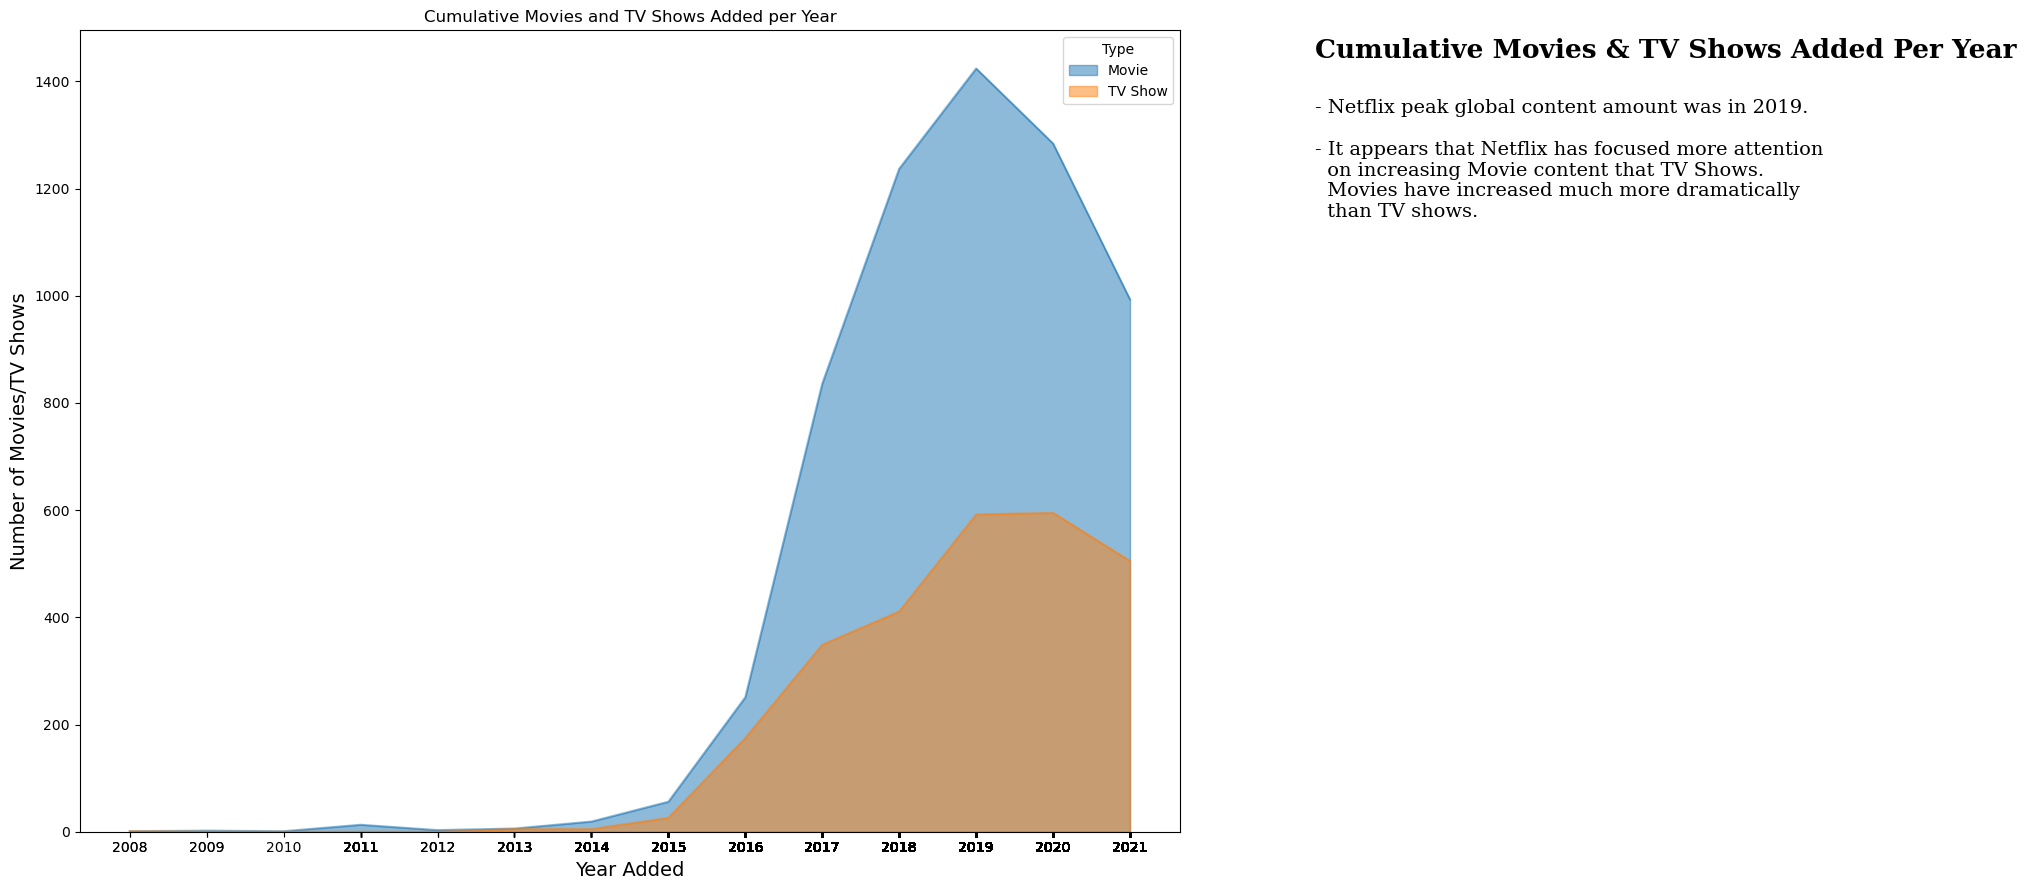

In [50]:
df_grouped = main_data.groupby(['year_added', 'type'])['type'].count().unstack(fill_value=0)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 9))
df_grouped.plot(kind='area', stacked=False, ax=ax)
ax.set_title('Cumulative Movies and TV Shows Added per Year')
ax.set_xlabel('Year Added',fontsize = 14)
ax.set_ylabel('Number of Movies/TV Shows', fontsize = 14)
ax.legend(title='Type')

plt.xticks(main_data['year_added'])
plt.tight_layout()

fig.text(1.1, 0.93, 'Cumulative Movies & TV Shows Added Per Year', fontsize=19, fontweight='bold', fontfamily='serif')
fig.text(1.1, 0.73, 
'''- Netflix peak global content amount was in 2019.

- It appears that Netflix has focused more attention
  on increasing Movie content that TV Shows. 
  Movies have increased much more dramatically
  than TV shows.
'''
, fontsize=14, fontweight='light', fontfamily='serif')
         
plt.show()

## Finding movies released in different months

In [51]:
# Count movies and TV shows per month_added
movie_counts_month = main_data[main_data.type == 'Movie'].month_added.value_counts()
tv_show_counts_month = main_data[main_data.type == 'TV Show'].month_added.value_counts()

# Combine counts into a single DataFrame with total (use add with fill_value=0 for missing values)
df_counts = pd.DataFrame({'Movie': movie_counts_month, 'TV Show': tv_show_counts_month})
df_counts['total_by_month'] = df_counts.sum(axis=1)

# Sort by total count in descending order
month_agg = df_counts.sort_values(by='total_by_month', ascending=False)

print(month_agg)

             Movie  TV Show  total_by_month
month_added                                
July           565      262             827
December       547      265             812
September      518      251             769
April          549      214             763
October        545      215             760
August         518      236             754
March          528      213             741
January        545      192             737
June           492      236             728
November       498      207             705
May            439      193             632
February       382      180             562


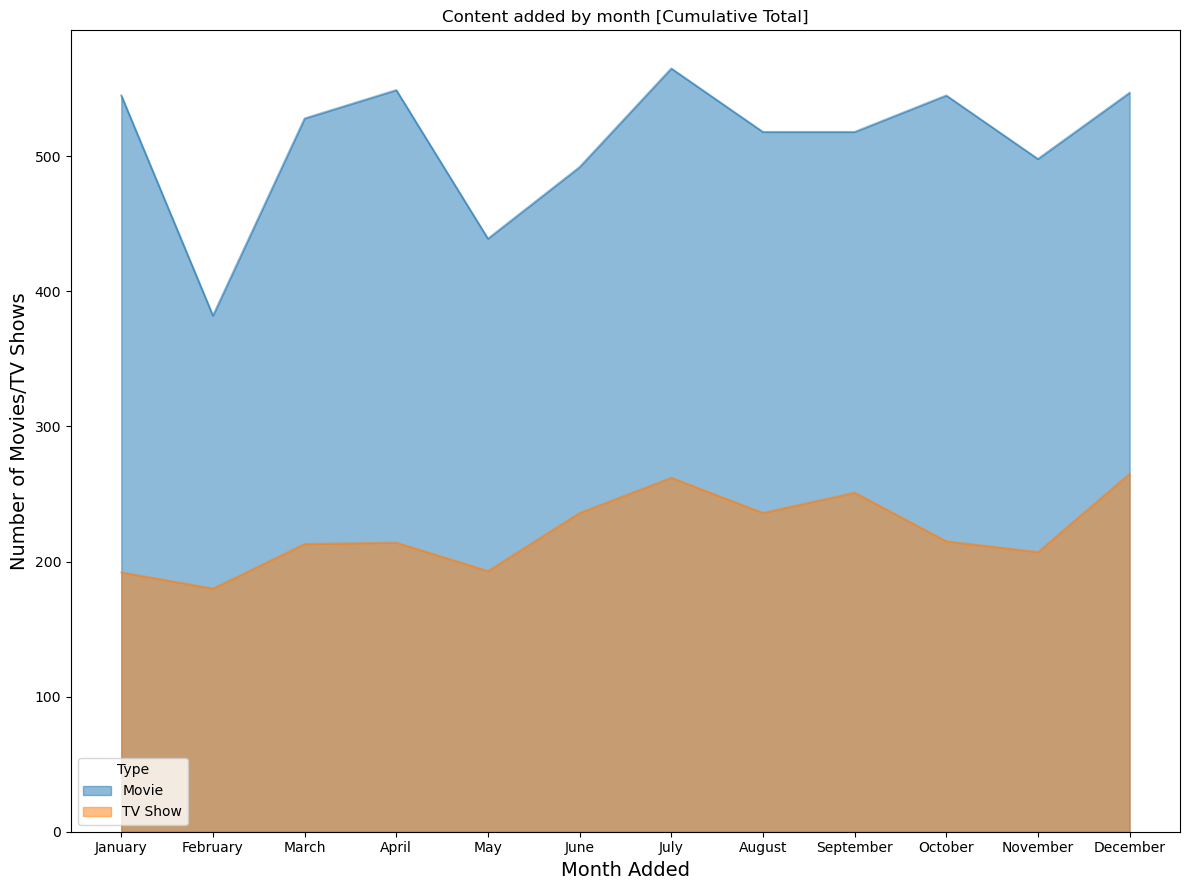

In [52]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

main_data['month_added'] = pd.Categorical(main_data['month_added'], categories=month_order, ordered=True)

df_grouped = main_data.groupby(['month_added', 'type'])['type'].count().unstack(fill_value=0)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 9))
df_grouped.plot(kind='area', stacked=False, ax=ax)
ax.set_title('Content added by month [Cumulative Total]')
ax.set_xlabel('Month Added',fontsize = 14)
ax.set_ylabel('Number of Movies/TV Shows', fontsize = 14)
ax.legend(title='Type')
plt.xticks(range(len(month_order)), month_order)

plt.tight_layout()
plt.show()

In [53]:
main_data.sample(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
1261,s1262,Movie,Fuga,Pablo LarraÃ­n,"BenjamÃ­n VicuÃ±a, GastÃ³n Pauls, Alfredo Cast...","Argentina, Chile",2021-02-26,2006,TV-MA,112 min,"Dramas, Independent Movies, International Movies",A struggling music student discovers and tries...,February,2021


# Finding movies/tv shows per countries by target ages

In [54]:
# mapping data rating to rating ages
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

main_data['target_ages'] = main_data['rating'].replace(ratings_ages)
main_data['target_ages'].unique()
# print(df['target_ages'].unique())


array(['Teens', 'Adults', 'Older Kids', 'Kids'], dtype=object)

In [55]:
# Count movies and TV shows per country by target_age
df_grouped = main_data.groupby(['country', 'target_ages'])['type'].count().unstack(fill_value=0)

# Combine counts into a single DataFrame with total
df_grouped['Total'] = df_grouped.sum(axis=1)

# Sort by total count in descending order
df_grouped = df_grouped.sort_values(by='Total', ascending=False)

# Show Target ages proportion of total content by top 10 countries
top_10_countries = df_grouped.head(10)
prop_of_total = top_10_countries.div(top_10_countries['Total'], axis=0) * 100

# Round percentages to 2 decimal places
prop_of_total = prop_of_total.round(2)

print(prop_of_total)

prop_of_total = prop_of_total.drop('Total', axis=1)

target_ages     Adults   Kids  Older Kids  Teens  Total
country                                                
United States    46.45   8.44       19.52  25.59  100.0
India            26.03   1.44       15.53  57.00  100.0
United Kingdom   51.20  10.05       19.62  19.14  100.0
Japan            35.80   1.23       24.69  38.27  100.0
South Korea      44.22   2.51       11.56  41.71  100.0
Canada           44.20  17.68       22.10  16.02  100.0
Spain            84.14   2.07        4.14   9.66  100.0
France           66.94   9.68        5.65  17.74  100.0
Mexico           77.27   1.82        8.18  12.73  100.0
Egypt            27.36   0.94        3.77  67.92  100.0


<Figure size 1800x900 with 0 Axes>

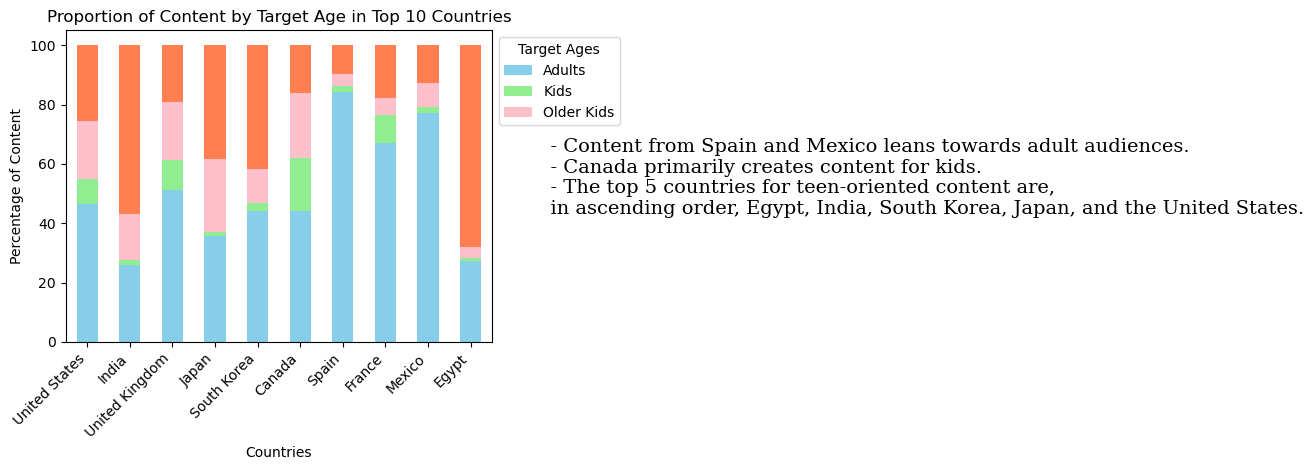

In [56]:
# Extract data for target ages (excluding 'Total' column)
target_ages = prop_of_total.columns[:-1]
countries = prop_of_total.index

# Create a stacked bar chart
plt.figure(figsize=(18, 9))  # Adjust the figure size as needed
prop_of_total.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen', 'pink', 'coral'])
plt.xlabel('Countries')
plt.ylabel('Percentage of Content')
plt.title('Proportion of Content by Target Age in Top 10 Countries')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add informative text using figtext
plt.figtext(
    0.83,  # Centered horizontally (0=left, 1=right)
    0.5,  # Slightly above bottom (0=bottom, 1=top)
    """
    - Content from Spain and Mexico leans towards adult audiences.
    - Canada primarily creates content for kids.
    - The top 5 countries for teen-oriented content are, 
    in ascending order, Egypt, India, South Korea, Japan, and the United States.
    """,
    fontsize=14,
    fontweight='light',
    fontfamily='serif',
)

plt.legend(title='Target Ages', labels=target_ages, loc='upper left', bbox_to_anchor=(1, 1))  # Add legend

# Display the chart
plt.tight_layout()

plt.show()